## Setting Up Twitter API


In [67]:
# importing required packages

import tweepy as tw
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import nltk 
from nltk.corpus import stopwords
from textblob import Word,TextBlob 


In [68]:
# After creating an app in twitterDevAcct get the requried credentials 

consumerApiKey = 'bVeDrepto9uHh2SvsI8P3mhJJ'
consumerApiKeySecret = 'jcLl2IxAx3rdTuRmaXUyejyOVvmEjMMOne9pmHbWqgRKHpj64L'
accessToken = '1410199170665779204-PoWrLearLxqi6y6g7eCWVaTjJxBvqy'
accessTokenSecret = 'n2KdMt7fOGi1iwz9c8Yg4cwBJ8NIIbExgVFvyQMilnmaS'


In [69]:
# Authenticating via 'OAuth 1.0a' authenticator of twitter

auth = tw.OAuthHandler(consumerApiKey,consumerApiKeySecret)
auth.set_access_token(accessToken,accessTokenSecret)
api = tw.API(auth,wait_on_rate_limit=True)


## Fetching Tweets

In [70]:
# fetching 1000 tweets usiing hashtag as query 
hashtag = '#UkraineRussiaWar'
query = tw.Cursor(api.search_tweets, q= hashtag).items(1000)
tweets = [{'Tweets':tweet.text,'TimeStamp':tweet.created_at} for tweet in query]   # creating a dict with keys 'Tweets' & 'TimeStamp' inside an array
df = pd.DataFrame.from_dict(tweets) # creating dataframe

In [71]:
# determining if a tweet talks about Russia or Ukraine 
ukrRef = ['Ukraine','ukraine','UKRAINE','Ukrainian','ukrainian','UKRAINIAN','Volodymyr','volodymyr','VOLODYMYR','zelenskyy','ZELENSKYY', 'Zelenskyy']
rusRef = ['russia','Russia','RUSSIA', 'RUSSIAN','russian','Russian','Vladimir','Putin','putin','PUTIN','vladimir','VLADIMIR']

def identifySubject(tweet,refs):
    flag =0
    for ref in refs:
        if tweet.find(ref) !=-1:
            flag = 1
    return flag
df['Ukraine'] = df['Tweets'].apply(lambda x: identifySubject(x,ukrRef))
df['Russia'] = df['Tweets'].apply(lambda x: identifySubject(x,rusRef))


## Preprocessing of Tweets

In [72]:
# setting up the unwanted words to be removed

nltk.download('stopwords')
nltk.download('wordnet')
stopWords = stopwords.words('english')
customStopWords = ['RT','#UkraineRussiaWar']

[nltk_data] Downloading package stopwords to /home/anunag/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/anunag/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [73]:
# defining function to pre-proccess tweets which removes stopwords and custom stopwords

def preProcTweets(tweet):
    preProcTweet = tweet

    #removing punctuations 
    punc ='''!()-[]}{;:'"\,<>./?@#$%^&*_~'''
    preProcTweet = "".join(word for word in preProcTweet if word not in punc)

    #removing stopwords and customs stopwords and then lemmatizing them
    preProcTweet = " ".join(word for word in preProcTweet.split() if word not in stopWords )
    preProcTweet = " ".join(word for word in preProcTweet.split() if word not in customStopWords )
    preProcTweet = " ".join(Word(word).lemmatize() for word in preProcTweet.split())
    return preProcTweet
df['Processed Tweets'] = df['Tweets'].apply(lambda x: preProcTweets(x))



## Calculating sentiments of Tweets

In [80]:
# Polarity: a range from [-1,1] i.e how much -ve or +ve

df['Polarity'] = df['Processed Tweets'].apply(lambda x: TextBlob(x).sentiment[0])

# Subjectivity: a range from [0,1] i.e how much -ve or +ve

df['Subjectivity'] = df['Processed Tweets'].apply(lambda x: TextBlob(x).sentiment[1])

In [95]:
# Analysing some statistics 
print("Our Data Frame : ")
display(df)
print("Number of tweets about Russia = ",df[df['Russia']==1].shape[0])
display(df[df['Russia']==1][['Russia','Polarity','Subjectivity']].groupby('Russia').agg([np.mean, np.amax,np.amin,np.median]))

print("Number of tweets about Ukraine = ",df[df['Ukraine']==1].shape[0])
df[df['Ukraine']==1][['Ukraine','Polarity','Subjectivity']].groupby('Ukraine').agg([np.mean, np.amax,np.amin,np.median])


Our Data Frame : 


,Tweets,TimeStamp,Ukraine,Russia,Processed Tweets,Polarity,Subjectivity
0,"RT @AnttoCh92: Alors @libe, on est fier de son...",2022-10-13 11:47:42+00:00,1,1,AnttoCh92 Alors libe est fier de son petit mon...,0.000000,0.000000
1,RT @BlogUkraine: #232dayofwar\n\n⚡#Estonia jus...,2022-10-13 11:47:41+00:00,1,0,BlogUkraine 232dayofwar ⚡Estonia approved new ...,0.018182,0.277273
2,RT @Militarylandnet: 📽️Ukrainian plane crashed...,2022-10-13 11:47:23+00:00,1,0,Militarylandnet 📽️Ukrainian plane crashed Polt...,-0.100000,0.600000
3,RT @Militarylandnet: 📽️Ukrainian plane crashed...,2022-10-13 11:47:19+00:00,1,0,Militarylandnet 📽️Ukrainian plane crashed Polt...,-0.100000,0.600000
4,RT @zwinkersmile: Der Büroleiter von #Selenski...,2022-10-13 11:47:13+00:00,0,0,zwinkersmile Der Büroleiter von Selenski Andre...,0.000000,0.000000
...,...,...,...,...,...,...,...
995,RT @sirotek: ไทยไม่ประณามรัสเซียยึด 4 แคว้นยูเ...,2022-10-13 09:21:36+00:00,1,1,sirotek ไทยไม่ประณามรัสเซียยึด 4 แคว้นยูเครน ร...,0.000000,0.000000
996,RT @Militarylandnet: 📷FH-70 155mm howitzers in...,2022-10-13 09:21:34+00:00,1,1,Militarylandnet 📷FH70 155mm howitzer service U...,0.000000,0.000000
997,RT @OnfireUkraine: Появилось видео повреждений...,2022-10-13 09:21:33+00:00,1,0,OnfireUkraine Появилось видео повреждений желе...,0.000000,0.000000
998,RT @OnfireUkraine: Результаты ракетного удара ...,2022-10-13 09:21:27+00:00,1,1,OnfireUkraine Результаты ракетного удара оккуп...,0.000000,0.000000


Number of tweets about Russia =  714


Polarity                  Subjectivity                 
            mean amax amin median         mean amax amin median
Russia                                                         
1       0.005761  0.6 -0.8    0.0     0.099727  1.0  0.0    0.0

Number of tweets about Ukraine =  782


Polarity                  Subjectivity                 
             mean amax amin median         mean amax amin median
Ukraine                                                         
1        0.000672  0.5 -0.8    0.0     0.131096  1.0  0.0    0.0

## Visualizing Our Results

In [92]:
#Calculating moving averages of polarity

russia = df[df['Russia']==1][['TimeStamp','Polarity']]
russia = russia.sort_values(by='TimeStamp',ascending=True)
russia['MA Polarity']=russia.Polarity.rolling(10,min_periods=3).mean() 

ukraine = df[df['Ukraine']==1][['TimeStamp','Polarity']]
ukraine = ukraine.sort_values(by='TimeStamp',ascending=True)
ukraine['MA Polarity']=ukraine.Polarity.rolling(10,min_periods=3).mean() 


Text(0.5, 0.98, 'Sentiment Analysis on Russia-Ukraine War')

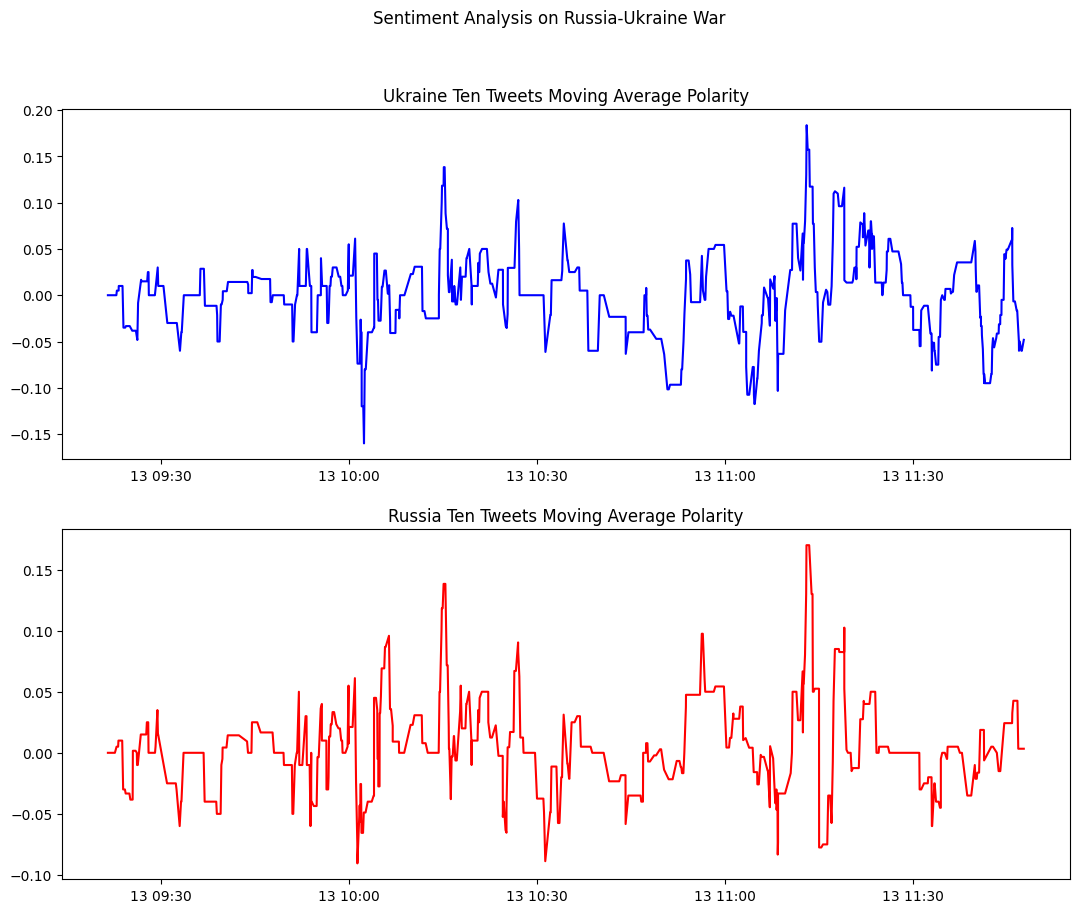

In [94]:
#ploting moving average of polarity

fig,axes = plt.subplots(2,1, figsize=(13,10))
axes[0].plot(ukraine['TimeStamp'],ukraine['MA Polarity'], color= 'blue')
axes[0].set_title('Ukraine Ten Tweets Moving Average Polarity')

axes[1].plot(russia['TimeStamp'],russia['MA Polarity'],color= 'red')
axes[1].set_title('Russia Ten Tweets Moving Average Polarity')

fig.suptitle('Sentiment Analysis on Russia-Ukraine War')
